# Import Dependencies

In [98]:
import tweepy
import os
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
from tqdm.notebook import tqdm_notebook


In [99]:
# Importing the dataset
DATASET_COLUMNS  = ["sentiment", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('C:/Users/Admin/Desktop/IIT/L6/Applied AI/CW/twitter_data.csv',
                      encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Removing the unnecessary columns.
dataset = dataset[['sentiment','text']]
# Replacing the values to ease understanding.
dataset['sentiment'] = dataset['sentiment'].replace(4,1)

In [100]:
dataset

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


In [101]:
# Reducing rows due to lack of computational power

dataset = dataset.drop(range(10000,1589999))

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


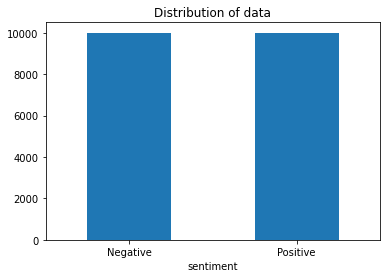

In [102]:
# Plotting the distribution for dataset.
ax = dataset.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)

dataset

In [103]:
# Clean the text

#Create function to clean text
def cleantxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions   
    text = re.sub(r'#', '', text) #Remove hashtags   
    text = re.sub(r'#', '', text) #Remove hashtags   
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove hyperlink
    
    return text

#cleaning text
tqdm_notebook.pandas()
dataset['text'] = dataset['text'].progress_apply(cleantxt)


#show cleaned text
dataset

  0%|          | 0/20001 [00:00<?, ?it/s]

,sentiment,text
0,0,"- Awww, that's a bummer. You shoulda got Da..."
1,0,is upset that he can't update his Facebook by ...
2,0,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am..."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


# Plot Word Cloud

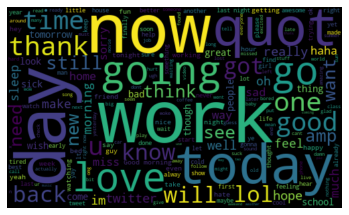

In [104]:
# PLot the word Cloud

allWords = ' '.join( [ twts for twts in dataset['text']])
wordCloud = WordCloud(width = 500, height=300, random_state = 21, max_font_size = 110).generate(allWords)


plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [105]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

# Cleaning Data

In [106]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [108]:
# Pipiline to remove punctuation, stopwords and perfrom count vectorization

def tweet_cleaning(tweet):
    remove_punctuation = [char for char in tweet if char not in string.punctuation]
    join_removed_punctuation = ''.join(remove_punctuation)
    cleant_tweet = [word for word in join_removed_punctuation.split() if word.lower() not in stopwords.words('english') ]
    return cleant_tweet

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = tweet_cleaning)
tweets_countvectorizer = CountVectorizer(analyzer =tweet_cleaning, dtype='uint8').fit_transform(dataset['text']).toarray()

In [110]:
tweets_countvectorizer.shape

(20001, 28383)

In [111]:
x = tweets_countvectorizer

In [112]:
y = dataset['sentiment']

# Building Testing Model

In [113]:
x.shape

(20001, 28383)

In [114]:
y.shape

(20001,)

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [116]:
from sklearn.naive_bayes import MultinomialNB
NB_classfier = MultinomialNB()
NB_classfier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Evaluation


In [117]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

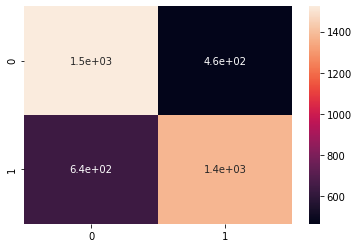

In [118]:
# Predicting Test Set Results
y_predict_test = NB_classfier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [119]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      1988
           1       0.75      0.68      0.71      2013

    accuracy                           0.72      4001
   macro avg       0.73      0.72      0.72      4001
weighted avg       0.73      0.72      0.72      4001

